In [38]:
import numpy as py
import pandas  as pd
data=pd.read_csv('/content/ML1 data.csv')
data
data=data.drop(columns=data.iloc[:, 5:23])  
data=data.drop(columns=data.iloc[:, 0:1]) 
data

data=data.dropna(axis=1)
A=data[['Candies (#)','Mangoes (Kg)','Milk Packets (#)']]
print("The matrix A is : \n",A)
C=data[['Payment (Rs)']]
print("The matrix C is : \n",C)

print("The dimension of the matrix A is: \n",A.shape)
print("The dimension of the matrix C is: \n",C.shape)
print("No of vectors exist in this vector space: ",len(A.index))

rank=py.linalg.matrix_rank(data)
print ('The rank of matrix data is',rank)

Ai=py.linalg.pinv(A)
X=py.dot(Ai,C)
print("The cost of each products: \n",X)

data['Category']=py.where(data['Payment (Rs)']>200,'Rich','Poor')
print(data)

The matrix A is : 
    Candies (#)  Mangoes (Kg)  Milk Packets (#)
0           20             6                 2
1           16             3                 6
2           27             6                 2
3           19             1                 2
4           24             4                 2
5           22             1                 5
6           15             4                 2
7           18             4                 2
8           21             1                 4
9           16             2                 4
The matrix C is : 
    Payment (Rs)
0           386
1           289
2           393
3           110
4           280
5           167
6           271
7           274
8           148
9           198
The dimension of the matrix A is: 
 (10, 3)
The dimension of the matrix C is: 
 (10, 1)
No of vectors exist in this vector space:  10
The rank of matrix data is 3
The cost of each products: 
 [[ 1.]
 [55.]
 [18.]]
   Candies (#)  Mangoes (Kg)  Milk Packets (#)  Payme

A4. Please refer to the data present in “IRCTC Stock Price” data sheet of the above excel file. Do the following after loading the data to your programming platform.•Calculate the mean and variance of the Price data present in column D. (Suggestion: if you use Python, you may use statistics.mean()& statistics.variance()methods).


The population Mean of price in column D = 1560.6634538152612
The Variance of price in column D = 58732.36535253918
The sample mean of wednesdays = 1550.7060000000001
The sample mean of month April price = 1698.9526315789474
Hence the sample mean is greater than population mean of price for both the questions
The probability of  making a loss over the stock = 0.4979919678714859
The probability of  making a profit on wednesday = 0.08433734939759036
Probability of day being wednesday = 0.20080321285140562
The Conditional probability of making a profit on Wednesday = 0.42


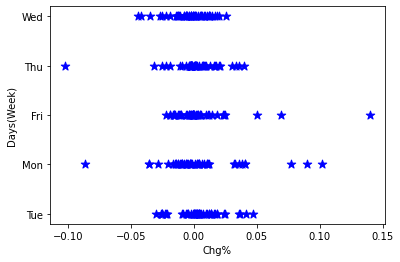

In [37]:
import matplotlib.pyplot as plt
data=pd.read_excel('/content/irctc (1).xlsx')
Mean=data['Price'].mean()
Variance=data['Price'].var()
print("The population Mean of price in column D =",Mean)
print("The Variance of price in column D =",Variance)

### Select the price data for all Wednesdays and calculate the sample mean.

data1=data.loc[data['Day']=="Wed"]
W=data1['Price'].mean()
print("The sample mean of wednesdays =",W)

### Select the price data for the month of Apr and calculate the sample mean.
### Compare the mean with the population mean and note your observations.
data2=data.loc[data['Month']=="Apr"]
A=data2['Price'].mean()
print("The sample mean of month April price =",A)
print("Hence the sample mean is greater than population mean of price for both the questions")

### From the Chg% (available in column I) find the probability of making a loss over the stock.
###(Suggestion: use lambda function to find negative values)

data['classify'] = data['Chg%'].apply(lambda x: 'PROFIT' if x > 0  else 'LOSS');
data
data1=data.loc[data['classify']=="PROFIT"]
r1=len(data1.axes[0])
r1
data2=data.loc[data['classify']=="LOSS"]
r2=len(data2.axes[0])
r2

prob_loss=py.divide(r1,(r1+r2))
print("The probability of  making a loss over the stock =",prob_loss)

### Calculate the probability of making a profit on Wednesday.

data1=data.loc[(data['classify']=="PROFIT") & (data['Day']=="Wed")]
data1
r=len(data1.axes[0])
r

prob_profit=py.divide(r,(r1+r2))
print("The probability of  making a profit on wednesday =",prob_profit)

### Calculate the conditional probability of making profit, given that today is Wednesday
### conditional probability   p(a/b)=p(a inst b)/p(b)
### finding probability of day being wednesday .

data1=data['Day']
r3=len(data1.axes[0])
data2=data.loc[data['Day']=="Wed"]
r4=len(data2.axes[0])
prob_wen=py.divide(r4,r3)
print("Probability of day being wednesday =",prob_wen)


### Conditional probability

prob_profit_wed=py.divide(prob_profit,prob_wen)
print("The Conditional probability of making a profit on Wednesday =",prob_profit_wed)

### Make a scatter plot of Chg% data against the day of the *week*
chg=data['Chg%'].to_numpy()
week=data['Day'].to_numpy()
week
plt.scatter(chg,week,marker='*', s=80,c='blue')
plt.ylabel("Days(Week)")
plt.xlabel("Chg%")
plt.show()
